In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve, convolve_fft
from astropy.visualization import imshow_norm, MinMaxInterval, SqrtStretch
fn = '../data/1551210093509O-result.csv' #stars in pi deg^2
dataset = Table.read(fn, )


In [2]:
%run ../code/nimsuv.py

In [477]:
# you'll want to oversize the image and cut down later
# 7.86 fhwh
# 3.93
# 12.8 -> 13.8 micron spot size

jitter_1sigma = 0.5
psf_std = 7.86 / 2.355 #  fwhm to std
image_shape = (20,20)
throughput = 0.5

rstate = 1235

I = ImageSimulation(texp=10, lam=0.4, dlam=0.3, psf_oversample=10, image_shape=image_shape,
                    ncoadds=60, jitter=jitter_1sigma, psf_shape=[psf_std, psf_std],
                    throughput=throughput, rstate=rstate)
J = ImageSimulation(texp=10, lam=0.4, dlam=0.3, psf_oversample=10, image_shape=image_shape,
                    ncoadds=60, jitter=0, psf_shape=[psf_std, psf_std],
                    throughput=throughput,  rstate=rstate)

In [478]:

bg_img = I.make_background_stars_image(dataset['phot_g_mean_mag'], rstate=rstate, noisy=True)
bg_img_noiseless = J.make_background_stars_image(dataset['phot_g_mean_mag'], rstate=rstate, noisy=False)

noise_img = I.make_background_noise_image(rstate=rstate, noisy=True)
noise_img_noiseless = I.make_background_noise_image(rstate=rstate, noisy=False)

In [479]:
kernel = Gaussian2DKernel(x_stddev=0.5/4, y_stddev=0.5/4)
bg_img_noiseless_conv = convolve(bg_img_noiseless, kernel)

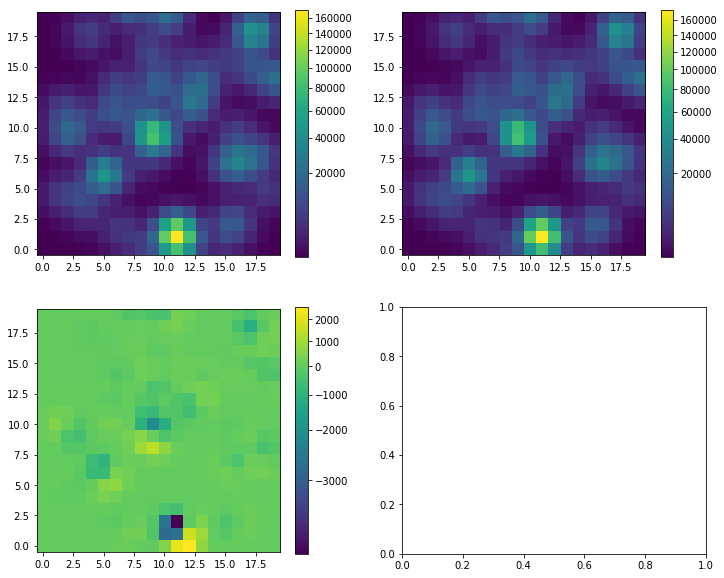

In [480]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,10])
ax = axes.flatten()[0]
# im = ax.imshow(bg_img, origin='lower', interpolation='nearest')
im, norm = imshow_norm(bg_img, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
ax = axes.flatten()[1]
# im = ax.imshow(bg_img_noiseless_conv, origin='lower', interpolation='nearest')
im, norm = imshow_norm(bg_img_noiseless_conv, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
ax = axes.flatten()[2]
im, norm = imshow_norm(bg_img-bg_img_noiseless_conv, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)

# fig.show(im)

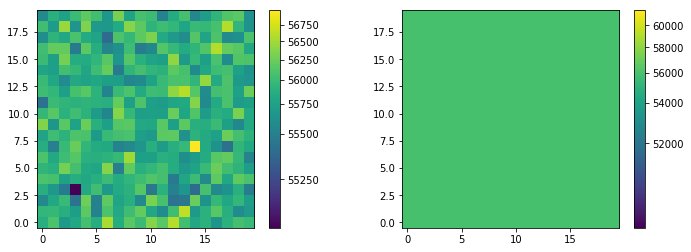

In [481]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
ax = axes.flatten()[0]

im, norm = imshow_norm(noise_img, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)

ax = axes.flatten()[1]
im, norm = imshow_norm(noise_img_noiseless, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)


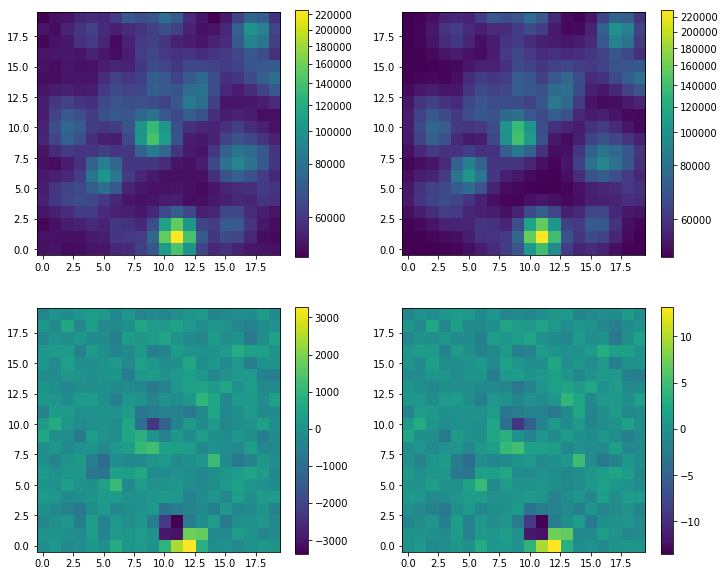

In [488]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,10])
ax = axes.flatten()[0]
im, norm = imshow_norm(bg_img + noise_img, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
ax = axes.flatten()[1]
im, norm = imshow_norm(bg_img_noiseless_conv + noise_img_noiseless, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
ax = axes.flatten()[2]
im, norm = imshow_norm((bg_img+noise_img)-(bg_img_noiseless_conv+noise_img_noiseless), ax, origin='lower',
                       interval=MinMaxInterval())
fig.colorbar(im, ax=ax)

ax = axes.flatten()[3]
im, norm = imshow_norm(((bg_img+noise_img)-(bg_img_noiseless_conv+noise_img_noiseless)) / 
                       np.std(noise_img), ax, origin='lower',
                       interval=MinMaxInterval())
fig.colorbar(im, ax=ax)

In [172]:
from astropy.modeling.functional_models import Gaussian2D
from astropy.convolution import discretize_model
gmodel = Gaussian2D(amplitude=1.0, x_mean=5., 
                    y_mean=125., x_stddev=0.75, y_stddev=3)
discretize_model(gmodel,
                 x_range=[0, 10],
                 y_range=[100, 125],
                 mode='oversample', factor=10)

ValueError: cannot reshape array of size 39710 into shape (36,10,11,10)

In [172]:
from astropy.modeling.functional_models import Gaussian2D
from astropy.convolution import discretize_model
gmodel = Gaussian2D(amplitude=1.0, x_mean=5., 
                    y_mean=125., x_stddev=0.75, y_stddev=3)
discretize_model(gmodel,
                 x_range=[0, 10],
                 y_range=[100, 125],
                 mode='oversample', factor=10)

ValueError: cannot reshape array of size 39710 into shape (36,10,11,10)

3.337579617834395

0.0